# Introduction

The healthcare industry is confronted with ever-increasing difficulties. When economic constraints, the need to provide timely medical care, and the availability of hospital beds are considered, it's clear that healthcare will face significant challenges in the coming years.Although this problem has existed for a long time, the recent COVID-19 pandemic has brought it to the forefront.
To face these challenges, hospitals must be able to predict Patient's length of stay(LOS) at the time of admission so that available  resources can be distributed efficiently.

In this assignment, I'll build a Machine Learning model to predict the duration of a patient's stay. The total hospitalization time, from admission to discharge, is generally referred to as the patient's length of stay. Length of stay predictions are used in a variety of ways and are an extremely useful tool for resource planning.

This ML model would predict whether a patient will be discharged from the hospital within 3 days (class 0) or stay for a longer time (4 days or more) (class 1) based on several features related to patient characteristics, conditions, drugs, services, hospital costs, and the patient's socioeconomic background.

## Objective
The aim of this project is to develope a machine learning model that can accurately predict whether a patient will be released from the hospital within three days (class 0) or will need to stay longer (4 days or more) (class 1).

The steps mentioned below will be taken in order to achieve this goal. 
- Select the type of our ML problem which can be applied to the LoS prediction task.
- Determine Performance/Evaluation metric and target value based on our goal.
- Load the dataset,examine and pre process the dataset.
- Perform Exploratory Data Analysis (EDA) on given dataset.
- Select two Baseline models
- Train,test and evaluate the models
- Comapre the performance of the baseline models and choose the best model to predict the result on unseen data(test data).

## Dataset
The original data is from from [HealthData: Hospital Inpatient Discharges (SPARCS De-Identified)].
The data is used in this assignement is based on original data with some modifications.
The dataset consits of newborn pateints admitted to the hospital. 
The datasets used in this assignment are:
• “train_data.csv”: Contain the train set, attributes and target for each patient.
This data is to be used in developing the models.
• “test_data.csv”: Contain the test set, attributes for each patient. This dataset is used to 
make predictions for unseen data.
• “s3807428_predictions.csv”: This dataset contains the predictions on
the unseen test data.

The columns of the original dataset are:
 
 Input Variables:
  1. ID - Unique number to represent patient ID.
  2. HealthServiceArea - A description of the Health Service Area (HSA) in which the hospital is located.      
     Capital/Adirondack, Central NY, Finger   Lakes, Hudson Valley, Long Island, New York City, Southern Tier, Western NY.
  3. Gender - Patient gender:   (M) Male, (F) Female, (U) Unknown.
  4. Race - Patient race. Black/African American, Multi, Other Race, Unknown, White. Other Race   includes Native Americans      and Asian/Pacific Islander.
  5. TypeOfAdmission -  A description of   the manner in which the patient was admitted to the health care facility:     
     Elective, Emergency, Newborn, Not Available, Trauma, Urgent.
  6. CCSProcedureCode - AHRQ Clinical Classification Software (CCS) ICD-9 Procedure Category Code
  7. APRSeverityOfIllnessCode - All Patient  Refined Severity of Illness (APR SOI) Description: Minor (1), Moderate (2),     
     Major (3), Extreme (4).
  8. PaymentTypology - A description of the type of payment for this occurrence.
  9. BirthWeight - The neonate birth weight in grams; rounded to nearest 100g.
  10. EmergencyDepartmentIndicator - Emergency Department Indicator is set based on the submitted revenue codes.If the   
     record contained an Emergency Department revenue code of 045X, the indicator is set to "Y", otherwise it will be “N”.
  11. AverageCostInCounty - Average hospitalization Cost In County of the patient.
  12. AverageChargesInCounty - Average medical Charges In County of the patient.
  13. AverageCostInFacility - Average Cost In Facility.
  14. AverageChargesInFacility - Average Charges In Facility.
  15. AverageIncomeInZipCode - Average Income In Zip Code.
 
 Output Variable(desired target):
  16. LengthOfStay - The total number  of patient days at an acute level and/or other than acute care level.
      class code (0=LengthOfStay < 4, 1= LengthOfStay >= 4). 

# Problem Formulation
The task in the Length of Stay (LOS) dataset is to predict the patient's lengh of stay(LengthOfStay), using all the attributes of the patient. This prediction problem can be identified as a classification task with two classes class 0 and class 1.  

# Load the dataset to Python Notebook and pre-process
Fist, import the required pacakges that will be used for data loading and analysis.
For loading the dataset,Pandas a Python package, is used, Matplotlib for data visualisation and Numpy, a numeric library, for matrcis and mathematical functionality.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

I used pandas to load theLength of stay train_data e dataset

In [8]:
LosTrainData = pd.read_csv('train_data.csv', delimiter=',')

The dataset is available at path ./Assignment1/train_data.csv'.
The read_csv() function loads the input file, which which is a csv formatted file delimited by comma, into a pandas dataframe.
Next, check the content of the loaded dataframe LosTrainData

In [10]:
print(LosTrainData)

          ID HealthServiceArea Gender                    Race TypeOfAdmission  \
0          1     New York City      F              Other Race         Newborn   
1          2     New York City      M  Black/African American         Newborn   
2          3     New York City      M              Other Race         Newborn   
3          4     New York City      F              Other Race         Newborn   
4          5     New York City      F              Other Race         Newborn   
...      ...               ...    ...                     ...             ...   
59961  59962        Western NY      M  Black/African American         Newborn   
59962  59963        Western NY      M                   White         Newborn   
59963  59964        Western NY      M                   White         Newborn   
59964  59965        Western NY      M                   White         Newborn   
59965  59966        Western NY      F                   White         Newborn   

       CCSProcedureCode  AP

As attribute ID and HealthServiceArea are not required for this analysis, i will drop these column from the dataset.

In [11]:
 LosTrainData.drop(columns=['ID', 'HealthServiceArea'],inplace=True)

To validate if the attribute ID and HealthServiceArea are dropped, i will used head method to check the first 5 rows of the dataframe

In [12]:
LosTrainData.head(5)

,Gender,Race,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay
0,F,Other Race,Newborn,228,1,Medicaid,3700,N,2611,9227,1751,8951,45,1
1,M,Black/African American,Newborn,228,1,Medicaid,2900,N,3242,8966,3338,6409,34,1
2,M,Other Race,Newborn,220,1,Private Health Insurance,3200,N,3155,11381,4980,9323,45,1
3,F,Other Race,Newborn,0,1,Private Health Insurance,3300,N,3155,11381,5826,15680,59,1
4,F,Other Race,Newborn,228,1,Medicaid,2600,N,2611,9227,6000,14344,59,1


As our task is to Predict if a given patient (i.e. newborn child) will be discharged from the hospital within 3 days (class 0) or will stay in hospital
beyond that - 4 days or more (class 1)”.
Let's check all the values for target LengthOfStay variable. For this, I have used display method to print the values.

In [13]:
display(LosTrainData['LengthOfStay'])

0        1
1        1
2        1
3        1
4        1
        ..
59961    4
59962    6
59963    4
59964    4
59965    4
Name: LengthOfStay, Length: 59966, dtype: int64

Next, transform the target variable LengthOfStay to class 0 if value is < 4 and to class 1 if length of stay is 4 or more.
I have used Numpy package's where condition to validation the values and replace them to their respective class.

In [14]:
LosTrainData['LengthOfStay'] = np.where(LosTrainData['LengthOfStay']<4, 0, 1)

In [15]:
display(LosTrainData['LengthOfStay'])

0        0
1        0
2        0
3        0
4        0
        ..
59961    1
59962    1
59963    1
59964    1
59965    1
Name: LengthOfStay, Length: 59966, dtype: int64

As, I have loaded the data into dataframe and transformed it as per the requirement, next i will perfom some basic statistics 
on LosTrainData dataframe to understand the variables carefully.

# Exploratory Data Analysis (EDA)
EDA is a critical process to perform initial investigations on data to gain maximize insight, examine the underlying data structure,detect the outliers with the help of summary satistics and graphical representations.

Let's see the shape of the dataframe using the shape command.

In [16]:
LosTrainData.shape

(59966, 14)

The dataframe LosTrainData has 59966 observations and 14 variables
Next, check the columns and their corresponding data types, along with null values. pnadas info method is used get the information about the dataframe

In [17]:
LosTrainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59966 entries, 0 to 59965
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Gender                        59966 non-null  object
 1   Race                          59966 non-null  object
 2   TypeOfAdmission               59966 non-null  object
 3   CCSProcedureCode              59966 non-null  int64 
 4   APRSeverityOfIllnessCode      59966 non-null  int64 
 5   PaymentTypology               59966 non-null  object
 6   BirthWeight                   59966 non-null  int64 
 7   EmergencyDepartmentIndicator  59966 non-null  object
 8   AverageCostInCounty           59966 non-null  int64 
 9   AverageChargesInCounty        59966 non-null  int64 
 10  AverageCostInFacility         59966 non-null  int64 
 11  AverageChargesInFacility      59966 non-null  int64 
 12  AverageIncomeInZipCode        59966 non-null  int64 
 13  LengthOfStay    

Let's compute the summary statistics of the dataframe LosTrainData by using pandas describe() function returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the data

In [18]:
LosTrainData.describe()

,CCSProcedureCode,APRSeverityOfIllnessCode,BirthWeight,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay
count,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000
mean,155.404229,1.254594,3336.298903,2372.806690,7979.126922,2396.414318,7958.472668,59.811143,0.167945
std,89.541978,0.546207,446.244475,639.755096,3220.291347,1248.501189,3859.294711,21.470170,0.373821
min,-1.000000,1.000000,2500.000000,712.000000,1243.000000,457.000000,1120.000000,28.000000,0.000000
25%,115.000000,1.000000,3000.000000,2041.000000,4620.000000,1551.000000,4438.000000,45.000000,0.000000
50%,220.000000,1.000000,3300.000000,2533.000000,9227.000000,1967.000000,7945.000000,55.000000,0.000000
75%,228.000000,1.000000,3600.000000,2785.000000,10644.000000,2895.000000,11619.000000,74.000000,0.000000
max,231.000000,4.000000,7500.000000,3242.000000,11381.000000,8114.000000,18466.000000,115.000000,1.000000


Observations:

1. From above summary statistics , attribute APRSeverityOfIllnessCode is an Ordinal categorical variable which 
   takes values as Minor (1), Moderate (2),   Major (3), Extreme (4).
2. variable CCSProcedureCode is having a negative value. 
3. Dataframe LosTrainData has both numerical and categorical data.

# Data Distribution
As we have both categorical and numerical variables, Let's plot histogram to evaluate distribution of a variable.
Matplotlib's hist() function is used to plot histogram.

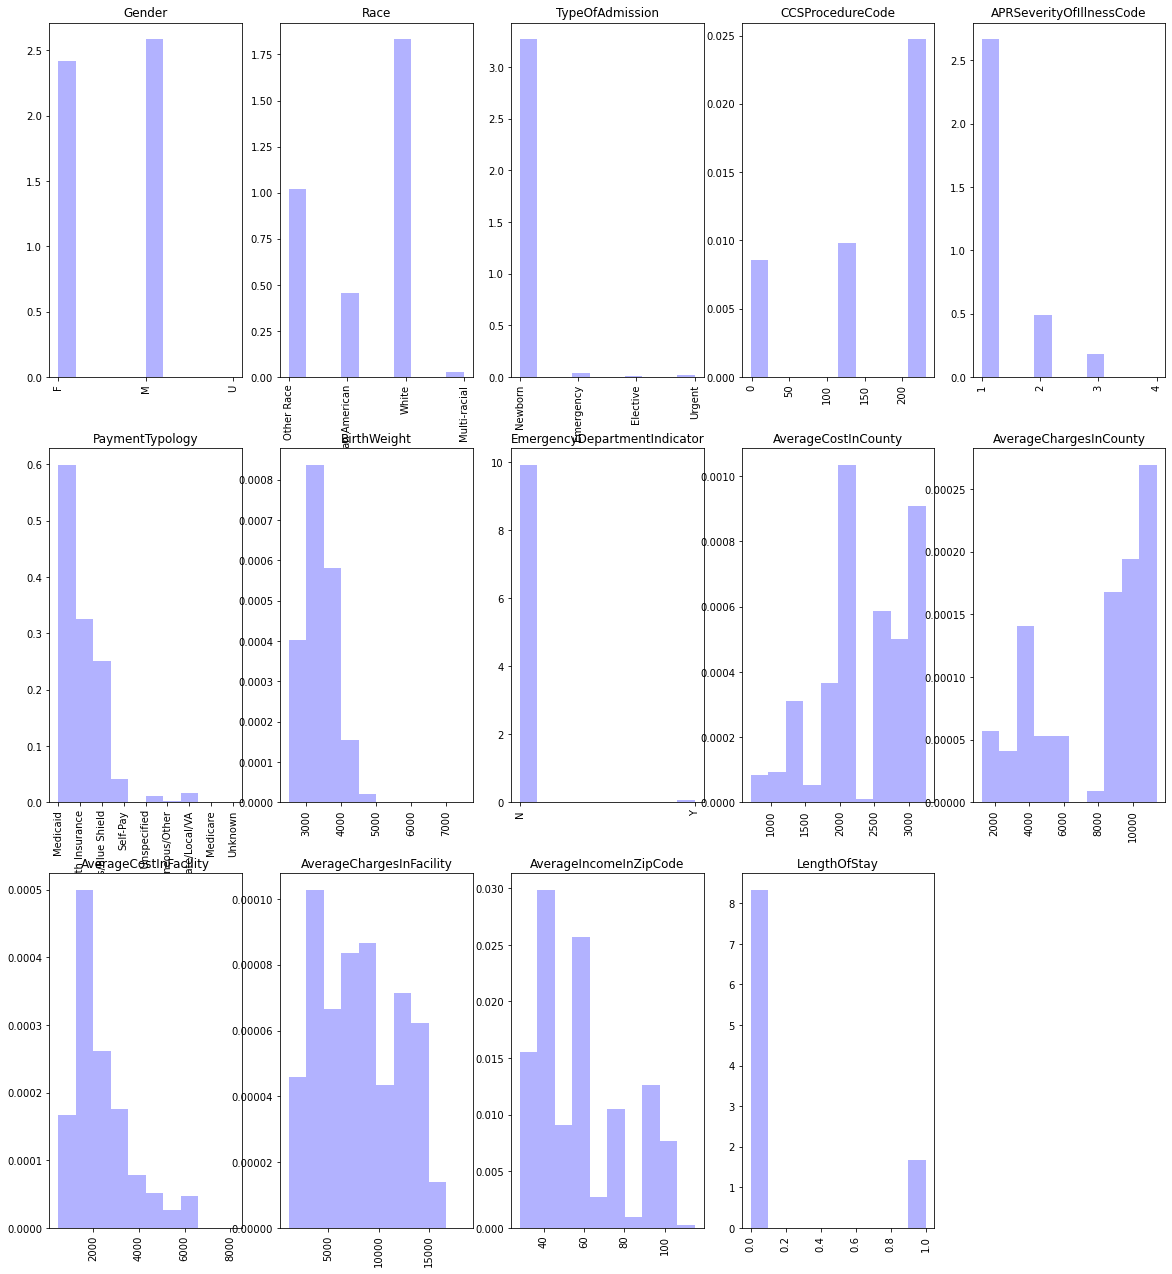

In [19]:
plt.figure(figsize=(20,30))
for i, col in enumerate(LosTrainData.columns):
    plt.subplot(4,5,i+1)
    plt.hist(LosTrainData[col], alpha=0.3, color='b', density=True)
    plt.title(col)
    plt.xticks(rotation='vertical')

Observations from above histogram distibution:

1. Attributes Gender,Race,TypeOfAdmission and EmergencyDepartmentIndicator are categorical variable.
2. Majority of Gender data instances are Male with just a single unknow gender.
3. Attribute Race's most of the data instances are for white with very few instances are from bi-racial
4. Majority of TypeOfAdmission data instances are for newborn with very few data instances are for rest of the values.
5. Most of the data instances for APRSeverityOfIllnessCode are from class 1(minor) with no data instances from class 4(Extreme).
6. Majority of EmergencyDepartmentIndicator data instances are from class N with very few instances are from class Y.
7. CCSProcedureCode is a categorical variable.
8. variables AverageCostInFacility,AverageIncomeInZipCode are skewed
9. Majority of Target Varoable LengthOfStay data instances are from class 0 with very few data instances are from class 1.
10. APRSeverityOfIllnessCode is an ordinal categorical variable.

As our task is to predict Length of stay(target variable) using all the other attribute,Lets use a box plot to observe our target variable LengthOfStay against other numerical variable and
examine for any possible outliers.
The boxplot() function is used to plot the boxplot.

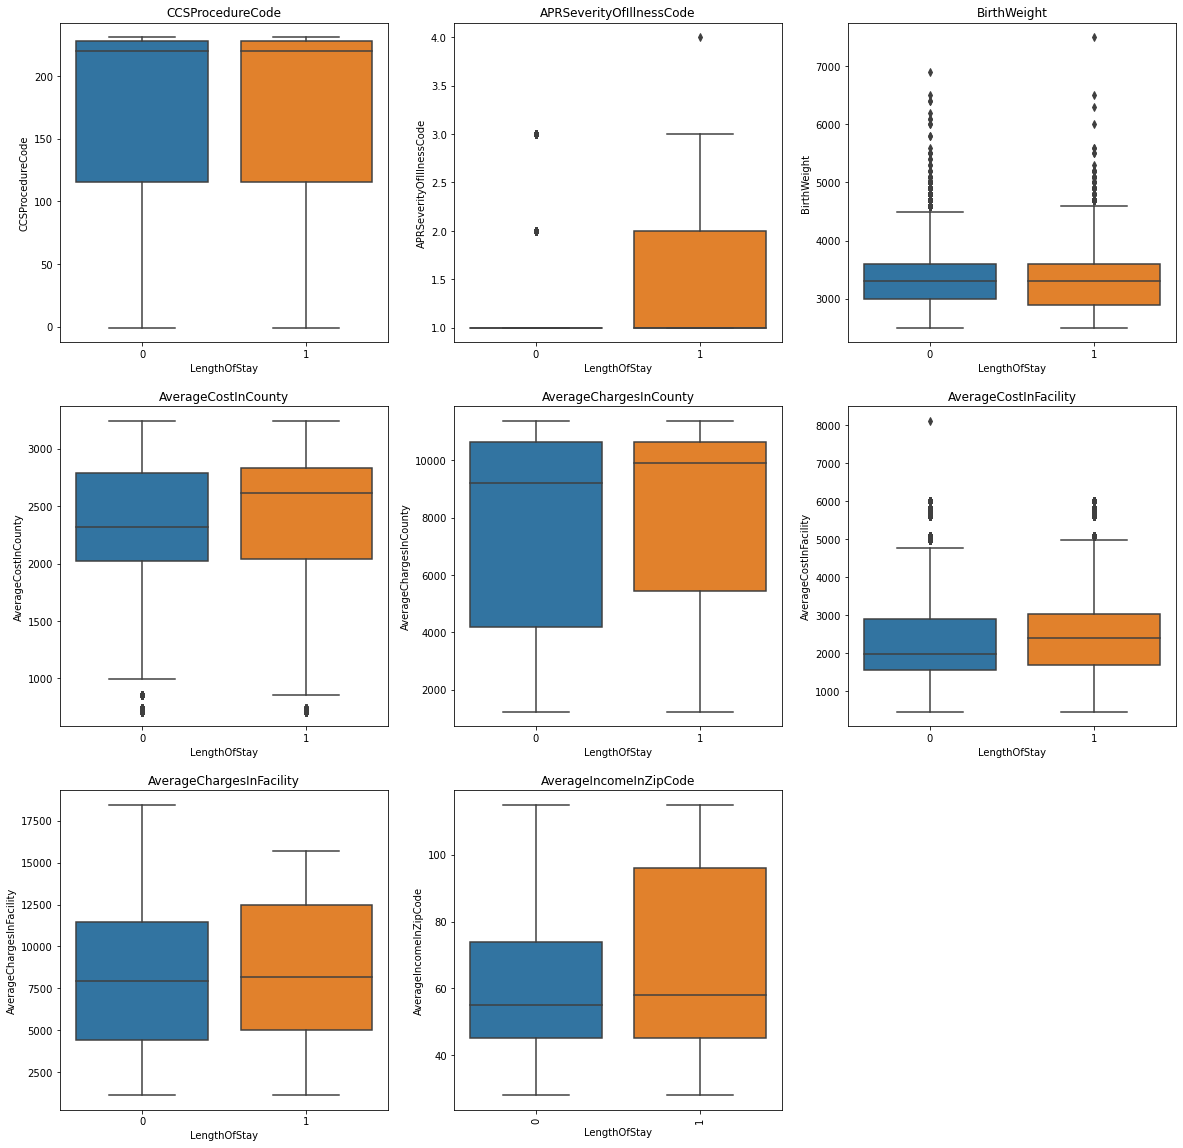

In [20]:
plt.figure(figsize=(20,20))
i=1
for col in LosTrainData.columns:
  
  if LosTrainData[col].dtypes != 'object' and col!= 'LengthOfStay' :
    plt.subplot(3,3,i)
    sns.boxplot(x='LengthOfStay',y=col,data=LosTrainData)
    i = i+1
    plt.title(col)
    
plt.xticks(rotation='vertical')
plt.show()

Observations from above box plot
1. CCSProcedureCode data instances are equally distributed amongest target variable LenghtOfStay class 0 and class 1.
2. on average, BirthWeight data instances are equally distributed between target variable LenghtOfStay class 0 and class 1.
   For BirthWeight data instances, the outliers are present in Both the class 0 and class 1. however, target variable    
   LenghtOfStay class 1 some outliers which are beyond the 
3. There are outliers present in AverageCostInCountry and AverageCostInFacility.


# Relationship between target variable LengthOfStay and other variables
Let's plot the correlation matrix between target variable LengthOfStay and other numerical data using Seaborn,a Python data visualization library based on matplotlib.

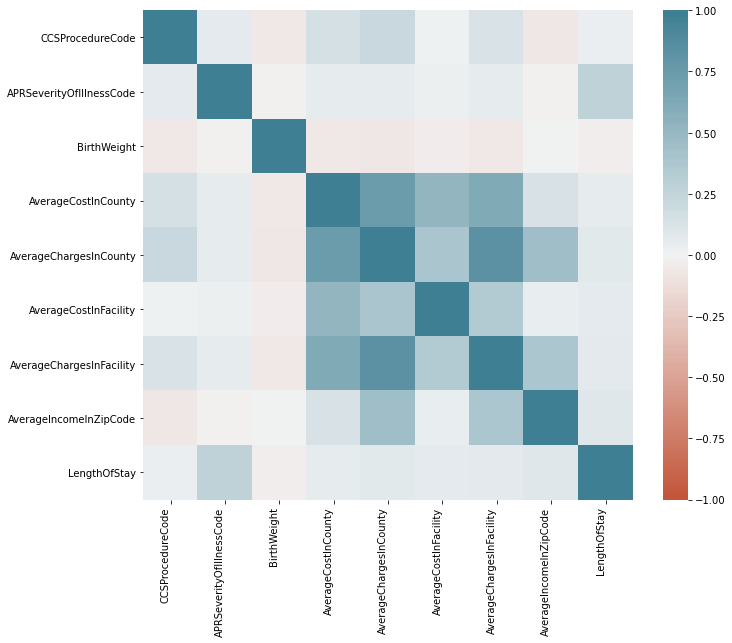

In [21]:
f, ax = plt.subplots(figsize=(11, 9))
corr = LosTrainData.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

Observations:
1. Some attributes have high correlation between them. e.g. AverageChargesInFacility and AverageChargesInCounty, AverageChargesInCounty and AverageCostInCounty.
2. APRSeverityOfIllnessCode has a positive correlation with the target variable LengthOfStay.

# Handle the missing values(unknown) in dataframe

As per the above histogram, we can see that there are some missing(unknown) values are present in variable Gender and PaymentTypology.
These are categorical variables so i will replace the unknown values('U') in Gender variable to mode values of Gender and 'Unknown' values to mode values of PaymentTypology in PaymentTypology variable.

In [22]:
LosTrainData['Gender'].value_counts()

M    30978
F    28987
U        1
Name: Gender, dtype: int64

In [23]:
Mode_Gender = LosTrainData['Gender'].mode()[0]
LosTrainData['Gender'].replace("U",Mode_Gender,inplace=True)

In [24]:
LosTrainData['Gender'].value_counts()

M    30979
F    28987
Name: Gender, dtype: int64

In [25]:
LosTrainData['PaymentTypology'].value_counts()

Medicaid                     28723
Private Health Insurance     15608
Blue Cross/Blue Shield       12073
Self-Pay                      1984
Federal/State/Local/VA         849
Managed Care, Unspecified      545
Miscellaneous/Other            118
Medicare                        44
Unknown                         22
Name: PaymentTypology, dtype: int64

In [26]:
Mode_PaymentTypology = LosTrainData['PaymentTypology'].mode()[0]
LosTrainData['PaymentTypology'].replace("Unknown",Mode_PaymentTypology,inplace=True)

In [27]:
LosTrainData['PaymentTypology'].value_counts()

Medicaid                     28745
Private Health Insurance     15608
Blue Cross/Blue Shield       12073
Self-Pay                      1984
Federal/State/Local/VA         849
Managed Care, Unspecified      545
Miscellaneous/Other            118
Medicare                        44
Name: PaymentTypology, dtype: int64

# Data Encoding
Based on EDA, dataframe have some nominal categorical attributes which are Gender,Race,TypeOfAdmission,PaymentTypology,CCSProcedureCode,CCSProcedureCode and EmergencyDepartmentIndicator and an ordinal categorical variable APRSeverityOfIllnessCode.
sklearn’s classification doen't work with categorical attributes.It only works with continuous numeric attributes. The target class, however, must be categorical.So the categorical attributed must be converted into a suitable continuous format.
Let's use one hot encoding technique to convert our all nominal categorical variable values to continuous format.


In [28]:
from sklearn.preprocessing import OneHotEncoder

OneHotEncoder_Gender = OneHotEncoder(handle_unknown='ignore')
OneHotEncoder_Gender.fit(LosTrainData[['Gender']])
onehot_Gender = OneHotEncoder_Gender.transform(LosTrainData[['Gender']]).toarray()

OneHotEncoder_Race = OneHotEncoder(handle_unknown='ignore')
OneHotEncoder_Race.fit(LosTrainData[['Race']])
onehot_Race = OneHotEncoder_Race.transform(LosTrainData[['Race']]).toarray()

OneHotEncoder_TypeOfAdmission = OneHotEncoder(handle_unknown='ignore')
OneHotEncoder_TypeOfAdmission.fit(LosTrainData[['TypeOfAdmission']])
onehot_TypeOfAdmission = OneHotEncoder_TypeOfAdmission.transform(LosTrainData[['TypeOfAdmission']]).toarray()

OneHotEncoder_PaymentTypology = OneHotEncoder(handle_unknown='ignore')
OneHotEncoder_PaymentTypology.fit(LosTrainData[['PaymentTypology']])
onehot_PaymentTypology = OneHotEncoder_PaymentTypology.transform(LosTrainData[['PaymentTypology']]).toarray()

OneHotEncoder_CCSProcedureCode = OneHotEncoder(handle_unknown='ignore')
OneHotEncoder_CCSProcedureCode.fit(LosTrainData[['CCSProcedureCode']])
onehot_CCSProcedureCode = OneHotEncoder_CCSProcedureCode.transform(LosTrainData[['CCSProcedureCode']]).toarray()

OneHotEncoder_EmergencyDepartmentIndicator = OneHotEncoder(handle_unknown='ignore')
OneHotEncoder_EmergencyDepartmentIndicator.fit(LosTrainData[['EmergencyDepartmentIndicator']])
onehot_EmergencyDepartmentIndicator = OneHotEncoder_EmergencyDepartmentIndicator.transform(LosTrainData[['EmergencyDepartmentIndicator']]).toarray()


print(onehot_Gender.shape, OneHotEncoder_Gender.categories_)
print(onehot_Race.shape, OneHotEncoder_Race.categories_)
print(onehot_TypeOfAdmission.shape, OneHotEncoder_TypeOfAdmission.categories_)
print(onehot_PaymentTypology.shape, OneHotEncoder_PaymentTypology.categories_)
print(onehot_CCSProcedureCode.shape, OneHotEncoder_CCSProcedureCode.categories_)
print(onehot_EmergencyDepartmentIndicator.shape, OneHotEncoder_EmergencyDepartmentIndicator.categories_)


(59966, 2) [array(['F', 'M'], dtype=object)]
(59966, 4) [array(['Black/African American', 'Multi-racial', 'Other Race', 'White'],
      dtype=object)]
(59966, 4) [array(['Elective', 'Emergency', 'Newborn', 'Urgent'], dtype=object)]
(59966, 8) [array(['Blue Cross/Blue Shield', 'Federal/State/Local/VA',
       'Managed Care, Unspecified', 'Medicaid', 'Medicare',
       'Miscellaneous/Other', 'Private Health Insurance', 'Self-Pay'],
      dtype=object)]
(59966, 7) [array([ -1,   0, 115, 216, 220, 228, 231])]
(59966, 2) [array(['N', 'Y'], dtype=object)]


Now, Let's put these columns back to the dataframe.

In [29]:
colName1 = 'Gender'
for i in range(len(OneHotEncoder_Gender.categories_[0])):
    LosTrainData[colName1 + '_' + str(OneHotEncoder_Gender.categories_[0][i])] = onehot_Gender[:,i]

In [30]:
colName2 = 'Race'
for i in range(len(OneHotEncoder_Race.categories_[0])):
    LosTrainData[colName2 + '_' + str(OneHotEncoder_Race.categories_[0][i])] = onehot_Race[:,i]

In [31]:
colName3 = 'TypeOfAdmission'
for i in range(len(OneHotEncoder_TypeOfAdmission.categories_[0])):
    LosTrainData[colName3 + '_' + str(OneHotEncoder_TypeOfAdmission.categories_[0][i])] = onehot_TypeOfAdmission[:,i]

In [32]:
colName4 = 'PaymentTypology'
for i in range(len(OneHotEncoder_PaymentTypology.categories_[0])):
    LosTrainData[colName4 + '_' + str(OneHotEncoder_PaymentTypology.categories_[0][i])] = onehot_PaymentTypology[:,i]

In [33]:
colName5 = 'CCSProcedureCode'
for i in range(len(OneHotEncoder_CCSProcedureCode.categories_[0])):
    LosTrainData[colName5 + '_' + str(OneHotEncoder_CCSProcedureCode.categories_[0][i])] = onehot_CCSProcedureCode[:,i]

In [34]:
colName6 = 'EmergencyDepartmentIndicator'
for i in range(len(OneHotEncoder_EmergencyDepartmentIndicator.categories_[0])):
    LosTrainData[colName6 + '_' + str(OneHotEncoder_EmergencyDepartmentIndicator.categories_[0][i])] = onehot_EmergencyDepartmentIndicator[:,i]

In [35]:
LosTrainData.head()

,Gender,Race,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,...,PaymentTypology_Self-Pay,CCSProcedureCode_-1,CCSProcedureCode_0,CCSProcedureCode_115,CCSProcedureCode_216,CCSProcedureCode_220,CCSProcedureCode_228,CCSProcedureCode_231,EmergencyDepartmentIndicator_N,EmergencyDepartmentIndicator_Y
0,F,Other Race,Newborn,228,1,Medicaid,3700,N,2611,9227,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,M,Black/African American,Newborn,228,1,Medicaid,2900,N,3242,8966,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,M,Other Race,Newborn,220,1,Private Health Insurance,3200,N,3155,11381,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,F,Other Race,Newborn,0,1,Private Health Insurance,3300,N,3155,11381,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,F,Other Race,Newborn,228,1,Medicaid,2600,N,2611,9227,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


Since we have represented the all the categorical column with the new columns, we should remove the original column to eliminate redundancy.

In [36]:
LosTrainData = LosTrainData.drop(['Gender','Race','TypeOfAdmission','PaymentTypology','EmergencyDepartmentIndicator','CCSProcedureCode'], axis=1)

In [37]:
LosTrainData.head()

,APRSeverityOfIllnessCode,BirthWeight,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay,Gender_F,Gender_M,...,PaymentTypology_Self-Pay,CCSProcedureCode_-1,CCSProcedureCode_0,CCSProcedureCode_115,CCSProcedureCode_216,CCSProcedureCode_220,CCSProcedureCode_228,CCSProcedureCode_231,EmergencyDepartmentIndicator_N,EmergencyDepartmentIndicator_Y
0,1,3700,2611,9227,1751,8951,45,0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1,2900,3242,8966,3338,6409,34,0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1,3200,3155,11381,4980,9323,45,0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1,3300,3155,11381,5826,15680,59,0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,2600,2611,9227,6000,14344,59,0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


# Setting up the performance (evaluation) metric
In this task, I want to give equal importance to all two classes therefore I'll use macro-averaged f1 score as my success metric. I'll use a confusion matrix to figure out what my classification model is predicting correctly and what kinds of errors it's producing. 

# Data Splits & Feature Scaling
Based on the EDA, there was a heavy imbalance between the two classes of target variable LengthOfStay.
To deal with this problem i am going to use stratified sampling to split the data into 80 % training data and 20 % test set.
I am going to perform Min-max scaling on each feature so that the values are mapped to the range [0,1] 
I am using power transformation for AverageCostInFacility variable to deal with the skewed data.

In [38]:
from sklearn.model_selection import train_test_split


with pd.option_context('mode.chained_assignment', None):
    train_data, test_data = train_test_split(LosTrainData, test_size=0.2, 
                                             shuffle=True,random_state=0,stratify = LosTrainData['LengthOfStay'])
    
print(train_data.shape[0], test_data.shape[0])

47972 11994


In [39]:
from sklearn.preprocessing import PowerTransformer

logNorm_attributes = ['AverageCostInFacility']
train_data_scaled = train_data.copy()
test_data_scaled = test_data.copy()
powertransformer = PowerTransformer(method='yeo-johnson', standardize=False).fit(train_data_scaled.loc[:, logNorm_attributes])
train_data_scaled.loc[:, logNorm_attributes] = powertransformer.transform(train_data_scaled.loc[:, logNorm_attributes])
test_data_scaled.loc[:, logNorm_attributes] = powertransformer.transform(test_data_scaled.loc[:, logNorm_attributes])

Text(0.5, 1.0, 'After Min-Max scaling')

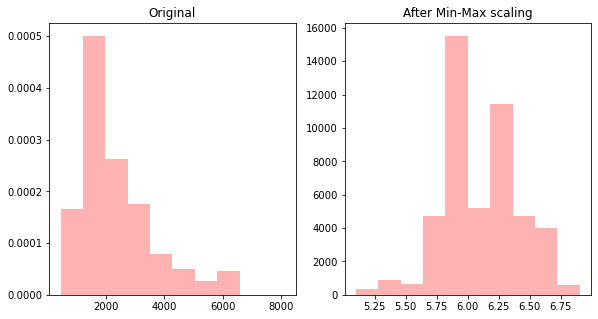

In [40]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.hist(train_data['AverageCostInFacility'], alpha=0.3, color='r', density=True)
plt.title("Original")

plt.subplot(1,3,2)
plt.hist(train_data_scaled['AverageCostInFacility'], alpha=0.3, color='r')
plt.title("After Min-Max scaling")

Next, seperate the target avriable and input variables.

In [41]:
train_X = train_data_scaled.drop(['LengthOfStay',], axis=1).to_numpy()
train_y = train_data_scaled[['LengthOfStay']].to_numpy()

test_X = test_data_scaled.drop(['LengthOfStay',], axis=1).to_numpy()
test_y = test_data_scaled[['LengthOfStay']].to_numpy()

# Baseline model:
For this Task, I've chosen regularised polynomial logistic regression as it is the simple model which works well with binary classification problem.Based on EDA,However, because of the 2D plain, a non-linear decision boundary could not be seen in the scatter plot to distinguish the groups, but in higher dimensions, a non-linear decision boundary could be seen to support the polynomial model. Since we have correlated, regularisation is justified.

In [42]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)
poly.fit(train_X)
train_X = poly.transform(train_X)
test_X = poly.transform(test_X)

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_X)

train_X = scaler.transform(train_X)
test_X = scaler.transform(test_X)

Lets setup a function to get the performance. This function will resturn tarin and test macro averaged f1 score.

In [44]:
from sklearn.metrics import f1_score

def get_f1_scores(clf, train_X, train_y, test_X, test_y):
    train_pred = clf.predict(train_X)
    test_pred = clf.predict(test_X)
    
    train_f1 = f1_score(train_y, train_pred, average='macro')
    test_f1 = f1_score(test_y, test_pred, average='macro')
    
    return train_f1, test_f1

# Hyper parameter tuning
I'm using 5 fold cross validation for cross validation. I set the penalty to 'l2' because I want to reduce the coefficent of the features that contribute the least to the final model prediction. I've set class weight='balanced' to give my two target classes the same weight.
To predict the best lambda value, I'm using cross validate.

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, make_scorer

f1_scorer = make_scorer(f1_score, average='weighted')
lambda_paras = np.logspace(-10, 2, num=5)

cv_results = dict()

for lambda_para in lambda_paras:
    clf = LogisticRegression(penalty='l2', C = 1.0/lambda_para, 
                             solver='liblinear', max_iter=1000, 
                             class_weight='balanced')
    
    scores = cross_validate(clf, train_X, train_y.ravel(), 
                            scoring=f1_scorer, return_estimator=True,
                            return_train_score=True, cv=5)
    
    cv_results[lambda_para] = scores

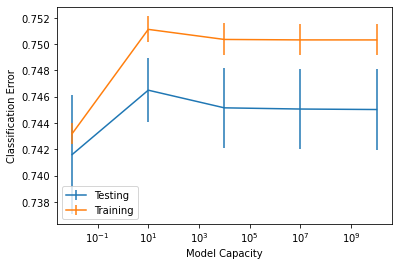

In [49]:
fig, ax = plt.subplots()

test_means = [np.mean(cv_results[lambda_para]['test_score']) 
             for lambda_para in lambda_paras]

test_std = [np.std(cv_results[lambda_para]['test_score']) 
           for lambda_para in lambda_paras]

train_means = [np.mean(cv_results[lambda_para]['train_score']) 
               for lambda_para in lambda_paras]

train_std = [np.std(cv_results[lambda_para]['train_score']) 
             for lambda_para in lambda_paras]

ax.errorbar([1.0/lambda_para for lambda_para in lambda_paras], 
            test_means,
            yerr=test_std)

ax.errorbar([1.0/lambda_para for lambda_para in lambda_paras], 
            train_means,
            yerr=train_std)

plt.xscale("log")
plt.ylabel('Classification Error')
plt.xlabel('Model Capacity')
plt.legend(['Testing','Training',])
plt.show()

In [79]:
best_lambda = 0.1    # best lambda according to the above figure

# get the split that has the closest performance value to the mean performance
best_classifier_inx = np.argmin(np.abs(cv_results[0.1]['test_score'] - np.mean(cv_results[0.1]['test_score'])))

clf = cv_results[0.1]['estimator'][best_classifier_inx]

# Testing the model

The next step is to evaluate our developed model and see if this model can be trusted to use to generalise to unseen data(test data).
I am going to use classification report to see macro averaged f1 score and confusion matrix to see how well my model has predicted the true positive and true negatives.

In [80]:
train_f1,test_f1 = get_f1_scores(clf,train_X,train_y,test_X,test_y)
print("Train f1 score: {:.3f}".format(train_f1))
print("Test f1 score: {:.3f}".format(test_f1))

Train f1 score: 0.624
Test f1 score: 0.615


In [76]:
from sklearn.metrics import classification_report
train_pred = clf.predict(train_X)
print(classification_report(train_y,train_pred))

              precision    recall  f1-score   support

           0       0.94      0.67      0.78     39915
           1       0.33      0.78      0.46      8057

    accuracy                           0.69     47972
   macro avg       0.63      0.73      0.62     47972
weighted avg       0.84      0.69      0.73     47972



In [ ]:
from sklearn.metrics import classification_report
test_pred = clf.predict(test_X)
print(classification_report(test_y,test_pred))

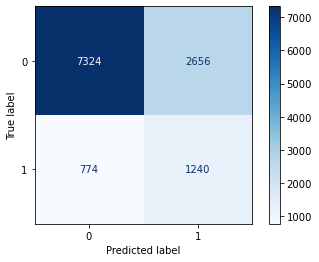

In [54]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(clf, test_X, test_y,
                                 cmap=plt.cm.Blues)
plt.show()

# Result:

From the above, the macro averaged f1 score for Train is 0.624 and Test is 0.615. By the classification report it
can be seen that the model has nicely predicted the class 0 as comapared to class 1 for both train and test. This can happen due to the imbalanced data.
From the confusion matrix:
True Positive (TP) = 7324,means that 560 positive class(class 0) data points were correctly classified by the model
True Negative (TN) = 1240, means 1240 negative class(class 1) data points were correctly classified by the model
False Positive (FP) = 2656 means 2656 negative class(1) data points were incorrectly classified which belong to the positive class(0) by the model
False Negative (FN) = 774,means that 50 positive class(0) data points were incorrectly classified which belong to the negative class(0) by the model

Though the model has predicted relatively large true positive, This model has not performed that well considering the macro f1 score and less number of true negative values.



# Base line Model-2

Since the baseline model, logistic regression, did not work well, I will use decision tree as my next model. Decision trees work well in this situation because I have a large dataset of both numerical and categorical variables.

# Decision tree
Lets train a simple decision tree and visualize it.
I have given max_depth = 10, as the dataset is quite large, and have selected class_weight='balanced to give equal weightage
to both of the target class.

Using the same splitted dataset, i have used for logistic regression.

In [120]:
train_X = train_data_scaled.drop(['LengthOfStay',], axis=1).to_numpy()
train_y = train_data_scaled[['LengthOfStay']].to_numpy()

test_X = test_data_scaled.drop(['LengthOfStay',], axis=1).to_numpy()
test_y = test_data_scaled[['LengthOfStay']].to_numpy()

In [121]:
from sklearn import tree

tree_max_depth = 10   #change this value and observe

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=tree_max_depth, class_weight='balanced')
clf = clf.fit(train_X, train_y)

Print the macro averaged f1 score for both Train and Test.

In [122]:
train_f1, test_f1 = get_f1_scores(clf,train_X, train_y, test_X, test_y)
print("Train f1 score: {:.3f}".format(train_f1))
print("Test f1 score: {:.3f}".format(test_f1))

Train f1 score: 0.655
Test f1 score: 0.629


We can see that as there is a significant gap between Train and test f1 score which leads to a overfitting as train f1 score is hiher than the test f1 score.However, if we increase or decrese the tree max_depth, it will lead to a overfiiting or underfitting. Our model has not reached to a good performance so let's hyper tune the parameter.

# Hyper parameter tuning
To increase the model performance and deal with the overfitting, let's tune the important hyper-paramters of the decision tree classifier to get the best performance.

In this task, I am using Sklearn function GridSearch to get the best set of hyper parameters which can be used to tune the model.
I have passed max_depth range from 10 to 400. and select the best criterion from entropy and gini.

In [123]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':np.arange(10,400, 100), 'min_samples_split':np.arange(2,50,5),'criterion':['entropy','gini']}

dt_clf = tree.DecisionTreeClassifier(class_weight='balanced')
Gridclf = GridSearchCV(dt_clf, parameters, scoring='f1_macro',cv=5)
Gridclf.fit(train_X, train_y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(class_weight='balanced'),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': array([ 10, 110, 210, 310]),
                         'min_samples_split': array([ 2,  7, 12, 17, 22, 27, 32, 37, 42, 47])},
             scoring='f1_macro')

In [124]:
pd.DataFrame(Gridclf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.136765,0.018241,0.004272,0.000260,entropy,10,2,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.624471,0.622211,0.628930,0.613857,0.613567,0.620607,0.006031,9
1,0.138015,0.012445,0.004683,0.000630,entropy,10,7,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.624040,0.621985,0.628950,0.614141,0.613271,0.620477,0.005981,10
2,0.140727,0.016028,0.004347,0.000420,entropy,10,12,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.624584,0.621915,0.629429,0.614329,0.614108,0.620873,0.005944,8
3,0.125306,0.002325,0.004304,0.000265,entropy,10,17,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.625674,0.621915,0.629409,0.614688,0.614279,0.621193,0.005970,6
4,0.130429,0.006056,0.004223,0.000269,entropy,10,22,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.625564,0.621569,0.629245,0.615124,0.614322,0.621165,0.005799,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.170097,0.006054,0.005127,0.000060,gini,310,27,"{'criterion': 'gini', 'max_depth': 310, 'min_s...",0.586045,0.585494,0.587504,0.580993,0.578162,0.583639,0.003498,45
76,0.165947,0.004341,0.005016,0.000068,gini,310,32,"{'criterion': 'gini', 'max_depth': 310, 'min_s...",0.591840,0.589759,0.591224,0.581802,0.578135,0.586552,0.005540,39
77,0.163243,0.004438,0.004603,0.000035,gini,310,37,"{'criterion': 'gini', 'max_depth': 310, 'min_s...",0.592490,0.594577,0.594366,0.585225,0.582409,0.589813,0.005029,33
78,0.158206,0.003771,0.004669,0.000101,gini,310,42,"{'criterion': 'gini', 'max_depth': 310, 'min_s...",0.595875,0.591211,0.594804,0.586554,0.582336,0.590156,0.005090,29


Print the best estimators

In [125]:
print(Gridclf.best_score_)
print(Gridclf.best_params_)

clf = Gridclf.best_estimator_

0.6219255673342363
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 47}


Next, print the macro averaged f1 score for Train and Test

In [126]:
train_f1, test_f1 = get_f1_scores(clf,train_X, train_y, test_X, test_y)
print("Train f1 score: {:.3f}".format(train_f1))
print("Test f1 score: {:.3f}".format(test_f1))

Train f1 score: 0.650
Test f1 score: 0.630


It can be seen that the decsion tree is still overfitting. To deal with the overfitting, I am going to use post pruning technique. The algorithm used for pruning a tree to prevent over-fitting is called minimal cost-complexity pruning. This algorithm identifies the node with the "weakest connection," an effective alpha. Then, starting with the nodes with the smallest effective alpha, they are pruned frist.

In [127]:
clf = tree.DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(train_X, train_y)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [128]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha, class_weight='balanced')
    clf.fit(train_X, train_y)
    clfs.append(clf)

Plot all the ccp_alpha values

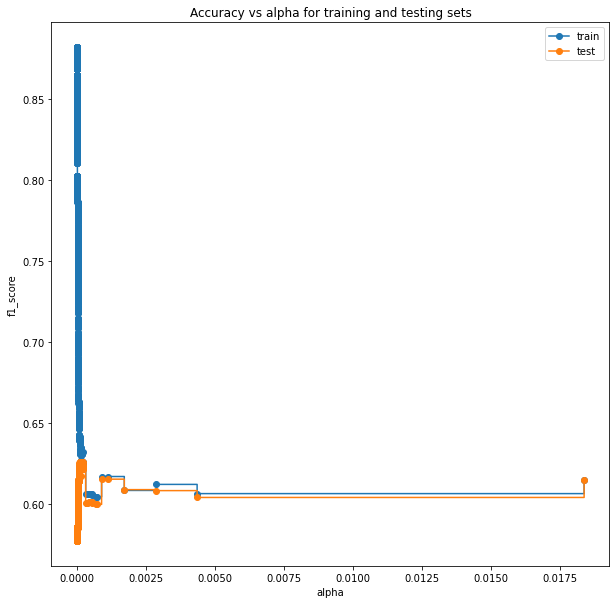

In [129]:
train_scores = [f1_score(train_y, clf.predict(train_X), average='macro') for clf in clfs]
test_scores = [f1_score(test_y, clf.predict(test_X), average='macro') for clf in clfs]

fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlabel("alpha")
ax.set_ylabel("f1_score")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

From above plot, It can be seen that the ccp_alpha values are clusterd at one place. let's zoome in the clusterd values in order to find the best ccp_alpha with the help of xlim and ylim parameter.

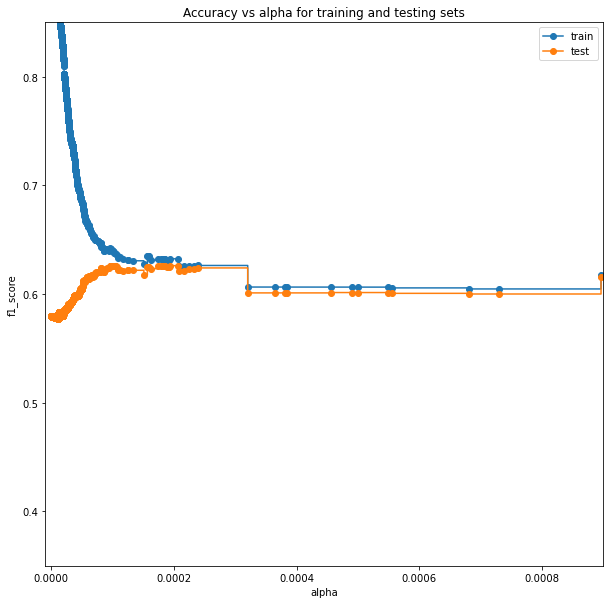

In [130]:
train_scores = [f1_score(train_y, clf.predict(train_X), average='macro') for clf in clfs]
test_scores = [f1_score(test_y, clf.predict(test_X), average='macro') for clf in clfs]

fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlabel("alpha")
ax.set_ylabel("f1_score")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.set_xlim(left=-0.00001,right=0.0009)
ax.set_ylim(bottom=0.35,top=0.85)
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

From the plot, i choose the ccp_alpha value as 0.0002 where variance and bias are low. the best ccp_alpha value is

Let's pass this value to decision tree classifier and fit our model.

In [142]:
clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=0.0002, class_weight='balanced')
clf.fit(train_X, train_y)

DecisionTreeClassifier(ccp_alpha=0.0002, class_weight='balanced',
                       random_state=0)

Print the macro f1 score for the final developed model

In [138]:
train_f1, test_f1 = get_f1_scores(clf,train_X, train_y, test_X, test_y)
print("Train f1 score: {:.3f}".format(train_f1))
print("Test f1 score: {:.3f}".format(test_f1))

Train f1 score: 0.632
Test f1 score: 0.626


# Testing the model
The next step is to evaluate our developed model and see if this model can be trusted to use to generalise to unseen data(test data). I am going to use classification report to see macro averaged f1 score and confusion matrix to see how well my model has predicted the true positive and true negatives.


In [143]:
from sklearn.metrics import classification_report
train_pred = clf.predict(train_X)
print(classification_report(train_y,train_pred))

              precision    recall  f1-score   support

           0       0.92      0.73      0.81     39915
           1       0.34      0.69      0.45      8057

    accuracy                           0.72     47972
   macro avg       0.63      0.71      0.63     47972
weighted avg       0.82      0.72      0.75     47972



In [144]:
from sklearn.metrics import classification_report
test_pred = clf.predict(test_X)
print(classification_report(test_y,test_pred))

              precision    recall  f1-score   support

           0       0.92      0.73      0.81      9980
           1       0.33      0.67      0.44      2014

    accuracy                           0.72     11994
   macro avg       0.62      0.70      0.63     11994
weighted avg       0.82      0.72      0.75     11994



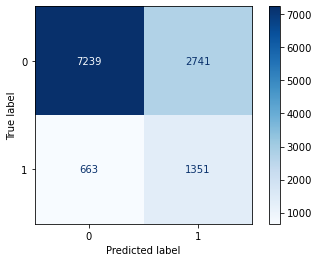

In [145]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(clf, test_X, test_y,
                                 cmap=plt.cm.Blues)
plt.show()

From the above, the macro averaged f1 score for Train is 0.632 and Test is 0.626. According to the classification study, the model has correctly predicted class 0 as compared to class 1 for both train and test.

The model has Significantly performed weel as it predicted relatively large true positive which means that the patient will be discharged earlier, and True negative values which means that patient is going to stay for longer period of the time.

# Final Model
The final recommended model for this task is decision tree. This model provided reasonable accuracy in terms of macro f1 score and predicted relatively high true positive, and True negative values as comapred to regression model.


# Decision Tree model on Unseen Data(test_csv)

let's load the test data into dataframe. 

In [154]:
test = pd.read_csv('test_data.csv', delimiter=',')

In [155]:
print(test)

          ID HealthServiceArea Gender                    Race TypeOfAdmission  \
0          1     New York City      F              Other Race         Newborn   
1          2     New York City      F                   White         Newborn   
2          3     New York City      M            Multi-racial         Newborn   
3          4     New York City      M              Other Race         Newborn   
4          5     New York City      F              Other Race         Newborn   
...      ...               ...    ...                     ...             ...   
69172  69173     Hudson Valley      M  Black/African American         Newborn   
69173  69174     Hudson Valley      M              Other Race         Newborn   
69174  69175     Hudson Valley      M              Other Race         Newborn   
69175  69176     Hudson Valley      M  Black/African American         Newborn   
69176  69177     Hudson Valley      M                   White         Newborn   

       CCSProcedureCode  AP

In [156]:
test.drop(columns=['ID', 'HealthServiceArea'],inplace=True)

In [157]:
test.head(5)

,Gender,Race,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode
0,F,Other Race,Newborn,216,3,Medicaid,4900,N,3242,8966,2448,13196,34
1,F,White,Newborn,220,1,Medicaid,3100,N,2611,9227,1751,8951,45
2,M,Multi-racial,Newborn,115,1,Medicaid,3300,N,3155,11381,1052,11314,74
3,M,Other Race,Newborn,228,1,Medicaid,3300,N,2611,9227,3790,6250,45
4,F,Other Race,Newborn,220,2,Medicaid,3800,N,3155,11381,3032,10135,59


In [160]:
test['PaymentTypology'].value_counts()

Medicaid                     37037
Private Health Insurance     14871
Blue Cross/Blue Shield       12795
Self-Pay                      2508
Managed Care, Unspecified     1539
Federal/State/Local/VA         320
Medicare                        43
Miscellaneous/Other             27
Unknown                         25
Department of Corrections       12
Name: PaymentTypology, dtype: int64

In [161]:
test['Gender'].value_counts()

M    35471
F    33704
U        2
Name: Gender, dtype: int64

Replace the unknown values with the mode

In [164]:
mode_data = test['Gender'].mode()[0]
test['Gender'].replace("U",mode_data,inplace=True)

In [165]:
Mode_PaymentTypology = test['PaymentTypology'].mode()[0]
test['PaymentTypology'].replace("Unknown",Mode_PaymentTypology,inplace=True)

one hot encoding

In [166]:
from sklearn.preprocessing import OneHotEncoder

onehot_Gender = OneHotEncoder_Gender.transform(test[['Gender']]).toarray()

onehot_Race = OneHotEncoder_Race.transform(test[['Race']]).toarray()

onehot_TypeOfAdmission = OneHotEncoder_TypeOfAdmission.transform(test[['TypeOfAdmission']]).toarray()

onehot_PaymentTypology = OneHotEncoder_PaymentTypology.transform(test[['PaymentTypology']]).toarray()

onehot_CCSProcedureCode = OneHotEncoder_CCSProcedureCode.transform(test[['CCSProcedureCode']]).toarray()

onehot_EmergencyDepartmentIndicator = OneHotEncoder_EmergencyDepartmentIndicator.transform(test[['EmergencyDepartmentIndicator']]).toarray()


In [168]:
colName1 = 'Gender'
for i in range(len(OneHotEncoder_Gender.categories_[0])):
    test[colName1 + '_' + str(OneHotEncoder_Gender.categories_[0][i])] = onehot_Gender[:,i]

colName2 = 'Race'
for i in range(len(OneHotEncoder_Race.categories_[0])):
    test[colName2 + '_' + str(OneHotEncoder_Race.categories_[0][i])] = onehot_Race[:,i]
colName3 = 'TypeOfAdmission'
for i in range(len(OneHotEncoder_TypeOfAdmission.categories_[0])):
    test[colName3 + '_' + str(OneHotEncoder_TypeOfAdmission.categories_[0][i])] = onehot_TypeOfAdmission[:,i]
colName4 = 'PaymentTypology'
for i in range(len(OneHotEncoder_PaymentTypology.categories_[0])):
    test[colName4 + '_' + str(OneHotEncoder_PaymentTypology.categories_[0][i])] = onehot_PaymentTypology[:,i]
colName5 = 'CCSProcedureCode'
for i in range(len(OneHotEncoder_CCSProcedureCode.categories_[0])):
    test[colName5 + '_' + str(OneHotEncoder_CCSProcedureCode.categories_[0][i])] = onehot_CCSProcedureCode[:,i]

colName6 = 'EmergencyDepartmentIndicator'
for i in range(len(OneHotEncoder_EmergencyDepartmentIndicator.categories_[0])):
    test[colName6 + '_' + str(OneHotEncoder_EmergencyDepartmentIndicator.categories_[0][i])] = onehot_EmergencyDepartmentIndicator[:,i]

In [169]:
test = test.drop(['Gender','Race','TypeOfAdmission','PaymentTypology','EmergencyDepartmentIndicator','CCSProcedureCode'], axis=1)

Predict the result for test_data by calling clf classifier of decision tree

In [170]:
test_predict = clf.predict(test)

In [171]:
test_predict

array([1, 0, 0, ..., 0, 0, 0])

Read the csv file for predictions

In [179]:
test_prediction = pd.read_csv('s123456_predictions.csv', delimiter=',')

Assign the prediction to LengthOfStay variable

In [180]:
test_prediction['LengthOfStay'] = test_predict

Write your prediction in s3807428_predictions.csv

In [181]:
test_prediction.to_csv('s3807428_predictions.csv',index=False)

# Model Limitations

1. one of the biuggest limitation for this model was, it was trained on imbalanced data which had large amount of data instances from class 0 which represnets that patient will be discharged as early as possible.